<a href="https://colab.research.google.com/github/charlotteyipr/Pub/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [ ]:
url = 'https://raw.githubusercontent.com/kartikjindgar/NYU-DataScience-Bootcamp-Fall23/main/Week6/train.csv'
## Load Data
data = pd.read_csv(url)

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(4234, 13)

In [ ]:
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4234 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             4234 non-null   int64  
 1   timestamp                      4234 non-null   object 
 2   country                        4234 non-null   object 
 3   employment_status              4234 non-null   object 
 4   job_title                      4234 non-null   object 
 5   job_years                      4234 non-null   float64
 6   is_manager                     4234 non-null   object 
 7   hours_per_week                 4234 non-null   float64
 8   telecommute_days_per_week      4234 non-null   float64
 9   education                      4234 non-null   object 
 10  is_education_computer_related  4234 non-null   object 
 11  certifications                 4234 non-null   object 
 12  salary                         4234 non-null   f

In [ ]:
data_train = data.copy()
data_train.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [ ]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object'
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['timestamp',
 'country',
 'employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [ ]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [ ]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data.shape

(4234, 4304)

In [ ]:
final_data.columns

Index(['id', 'job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'certifications', 'salary',
       'timestamp_1/1/2018 13:55:49', 'timestamp_1/1/2018 22:41:10',
       'timestamp_1/1/2018 9:03:21',
       ...
       'job_title_Other', 'job_title_Principal database engineer',
       'job_title_Sales', 'job_title_Sr Consultant ',
       'education_Bachelors (4 years)', 'education_Doctorate/PhD',
       'education_Masters', 'education_None (no degree completed)',
       'is_education_computer_related_Unknown',
       'is_education_computer_related_Yes'],
      dtype='object', length=4304)

In [ ]:
final_data

,id,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,timestamp_1/1/2018 13:55:49,timestamp_1/1/2018 22:41:10,timestamp_1/1/2018 9:03:21,timestamp_1/1/2019 20:22:20,timestamp_1/1/2019 22:14:11,timestamp_1/1/2019 5:57:21,timestamp_1/1/2019 7:46:34,timestamp_1/10/2017 0:15:01,timestamp_1/10/2017 0:22:12,timestamp_1/10/2017 0:29:52,timestamp_1/10/2017 0:31:28,timestamp_1/10/2017 0:47:33,timestamp_1/10/2017 10:24:09,timestamp_1/10/2017 10:31:43,timestamp_1/10/2017 10:45:15,timestamp_1/10/2017 10:55:09,timestamp_1/10/2017 11:14:30,timestamp_1/10/2017 11:17:35,timestamp_1/10/2017 11:27:26,timestamp_1/10/2017 11:35:05,timestamp_1/10/2017 11:36:14,timestamp_1/10/2017 11:43:19,timestamp_1/10/2017 11:51:00,timestamp_1/10/2017 11:57:41,timestamp_1/10/2017 12:06:36,timestamp_1/10/2017 12:15:30,timestamp_1/10/2017 12:18:40,timestamp_1/10/2017 12:27:07,timestamp_1/10/2017 12:41:22,timestamp_1/10/2017 12:45:58,timestamp_1/10/2017 12:47:24,timestamp_1/10/2017 12:48:51,timestamp_1/10/2017 13:20:05,timestamp_1/10/2017 13:31:44,timestamp_1/10/2017 13:31:49,timestamp_1/10/2017 13:31:57,timestamp_1/10/2017 13:51:19,timestamp_1/10/2017 14:03:49,timestamp_1/10/2017 14:11:00,timestamp_1/10/2017 14:31:40,timestamp_1/10/2017 14:39:47,timestamp_1/10/2017 14:54:14,timestamp_1/10/2017 14:56:15,...,country_Norway,country_Pakistan,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Romania,country_Russia,country_Saudi Arabia,country_Serbia and Montenegro,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Venezuela,country_Vietnam,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,1,4.783930,1,40.000000,0.0,0,7187.743094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,2,5.000000,0,40.000000,5.0,0,10000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,3,1.000000,0,40.000000,0.0,1,7000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,4,1.000000,0,40.000000,2.0,0,8333.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,3.000000,0,40.000000,2.0,1,7137.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,4272,4.907064,0,40.727005,0.0,1,

In [ ]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (2963, 4303)
Validation Set Dimensions: (1271, 4303)


In [ ]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols

['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [ ]:
# Apply standard scaling on numeric data
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [ ]:
X_train

,id,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,timestamp_1/1/2018 13:55:49,timestamp_1/1/2018 22:41:10,timestamp_1/1/2018 9:03:21,timestamp_1/1/2019 20:22:20,timestamp_1/1/2019 22:14:11,timestamp_1/1/2019 5:57:21,timestamp_1/1/2019 7:46:34,timestamp_1/10/2017 0:15:01,timestamp_1/10/2017 0:22:12,timestamp_1/10/2017 0:29:52,timestamp_1/10/2017 0:31:28,timestamp_1/10/2017 0:47:33,timestamp_1/10/2017 10:24:09,timestamp_1/10/2017 10:31:43,timestamp_1/10/2017 10:45:15,timestamp_1/10/2017 10:55:09,timestamp_1/10/2017 11:14:30,timestamp_1/10/2017 11:17:35,timestamp_1/10/2017 11:27:26,timestamp_1/10/2017 11:35:05,timestamp_1/10/2017 11:36:14,timestamp_1/10/2017 11:43:19,timestamp_1/10/2017 11:51:00,timestamp_1/10/2017 11:57:41,timestamp_1/10/2017 12:06:36,timestamp_1/10/2017 12:15:30,timestamp_1/10/2017 12:18:40,timestamp_1/10/2017 12:27:07,timestamp_1/10/2017 12:41:22,timestamp_1/10/2017 12:45:58,timestamp_1/10/2017 12:47:24,timestamp_1/10/2017 12:48:51,timestamp_1/10/2017 13:20:05,timestamp_1/10/2017 13:31:44,timestamp_1/10/2017 13:31:49,timestamp_1/10/2017 13:31:57,timestamp_1/10/2017 13:51:19,timestamp_1/10/2017 14:03:49,timestamp_1/10/2017 14:11:00,timestamp_1/10/2017 14:31:40,timestamp_1/10/2017 14:39:47,timestamp_1/10/2017 14:54:14,timestamp_1/10/2017 14:56:15,timestamp_1/10/2017 15:25:08,...,country_Norway,country_Pakistan,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Romania,country_Russia,country_Saudi Arabia,country_Serbia and Montenegro,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Venezuela,country_Vietnam,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
2903,2904,-1.237777,0,-0.492425,-0.636458,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
893,894,-0.239118,1,2.323311,-0.636458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2783,2784,-0.738448,0,2.323311,-0.036832,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1364,1365,-0.738448,1,2.323311,-0.636458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3397,3398,-1.737106,0,-0.492425,-0.636458,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,87

In [ ]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.coef_

array([ 8.63142487e-01,  3.77536933e+01, -1.78638348e+03, ...,
       -8.21649726e+02, -2.78619523e+02,  8.78609146e+02])

In [ ]:
reg.intercept_

7197.010298628081

In [ ]:
mean_absolute_error(y_train,reg.predict(X_train))

2.082844774667494e-09

In [ ]:
mean_squared_error(y_train,reg.predict(X_train))**0.5

6.892912343708868e-09

6544.220230386772 6646.3048953891075


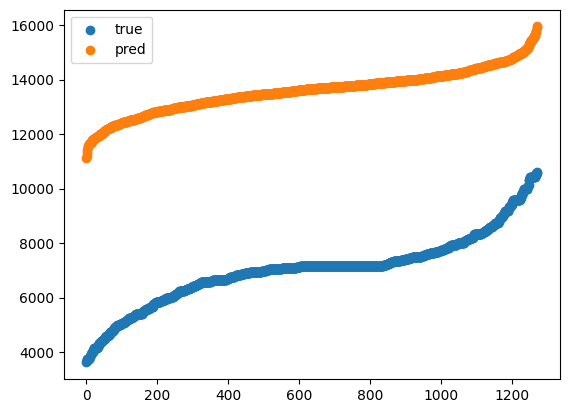

In [ ]:
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test), label='true')
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred), label = 'pred')
plt.legend()

In [ ]:
ridge.coef_

array([ 1.08522852e-02,  1.78840119e+02,  1.20525650e+02, ...,
        4.00422173e+02, -3.60651487e+02, -1.13981264e+02])

6691.637840351144 6791.611990608157


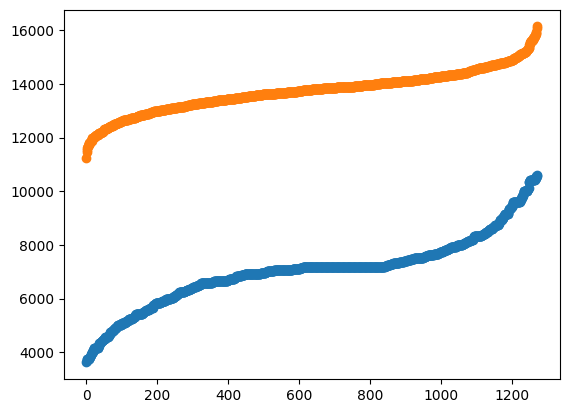

In [ ]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test))
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred))

In [ ]:
lasso.coef_

array([ 9.13363339e-03,  1.78530527e+02,  1.29778766e+02, ...,
        3.48098421e+02, -3.37271583e+02, -1.06418515e+02])

In [ ]:
# train Decision Tree regression model
decisiontree = DecisionTreeRegressor(max_depth = 10, min_samples_split = 5)
decisiontree.fit(X_train, y_train)

#evaluating train error
mean_absolute_error(y_train,decisiontree.predict(X_train))

581.6050558621681

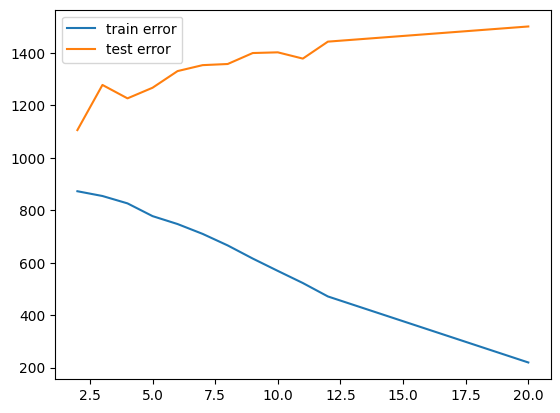

In [ ]:
max_depth_list = [2,3,4,5,6,7,8,9,10,11,12,20]
train_error = []
test_error =[]

for md in max_depth_list:

    decisiontree = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(max_depth_list,train_error,label = 'train error')
plt.plot(max_depth_list,test_error,label = 'test error')
plt.legend()

In [ ]:
# Fitting a Random Forest Regressor
randomf = RandomForestRegressor()
randomf.fit(X_train, y_train)
mean_absolute_error(y_train,randomf.predict(X_train))

263.5788379891679